# Quadrupole magnets
## A simple example

## Introduction

The Radia Multipole Magnets (*radia_mm*) module [1] is dedicated to the simulations of accelerator electromagnet quadrupoles. *radia_mm* is based on the Radia magnetostatic code [2, 3]. It inclules functions for building multipoles such as bending magnets, quadrupole lenses and higher order multipoles. 

Radia Multipole Magnets provide an upper layer to Radia. It allows to build fully parameterized accelerator magnets with a few command lines. A *radia_mm* object contains parameters (yoke parameters, coil parameters, mesh, etc.) and Radia objects (e.g. the main Radia object named self.obj). Additional methods are provided for visualisation, field analysis and aims to simplify the use of Radia.

Gael Le Bec, ESRF-The European Synchrotron, 2020.

## Imports

In [1]:
# Add paths to RadiaMM and RadiaUtils or added it to your PYTHONPATH
import sys
sys.path.append('../../PyRadia/RadiaMM/') # Radia Multipole Magnets
sys.path.append('../../PyRadia/RadiaUtils/')# Magnetic materials, Radia export functions, etc.

# Import the radia_mm module
import radia_mm as mm
import radia as rad

# Other imports
import numpy as np
from matplotlib.pyplot import plot, xlabel, ylabel, semilogy
from subprocess import Popen

## Build and solve an electromagnet quadrupole

The functions below, called with default arguments, build and solve an ESRF-EBS high gradient quadrupole. The computations should take a few minutes. These magnets were described in details a paper [4].

In [2]:
# Quadrupole parameters
params = mm.QuadEMParam()

# Build and solve
quad = mm.QuadEM(params)

6 / 7 / 2020  at  12 : 57 : 51  Start to solve the magnetization problem...
6 / 7 / 2020  at  12 : 58 : 8  Magnetization problem solved.


## 3D plot of the magnet geometry

Plot a quadrupole:

In [3]:
quad.plot_geo()

Then plot the yoke:

In [4]:
quad.yoke.plot_geo()

Build and plot 1/4 of a quadrupole:

In [5]:
quarter = quad.yoke + quad.coil
quarter.plot_geo()

## Field computations

### Transverse field

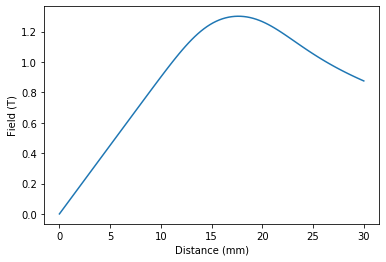

In [12]:
quad.plot_field([30, 0, 0])

Usage of the *plot_field* method:

In [7]:
help(quad.plot_field)

Help on method plot_field in module radia_mm:

plot_field(xyz_end, xyz_start=[0, 0, 0], n=100, b='bz', x_axis='d', plot_show=True, plot_title='') method of radia_mm.QuadEM instance
    Compute and plot the field along a straight line
    :param xyz_end: end point [x, y, z]
    :param xyz_start: starting point [x, y, z] (default = [0, 0, 0])
    :param n: number of points (default = 100)
    :param b: field component (default = 'bz')
    :param x_axis: defines the x axis of the plot, x_axis = 'x', 'y', 'z' or 'd' (default = 'd', i.e. distance)
    :param show: show the plot if True
    :param plot_title: plot title



Please see the *field* method for computing the field values on a given straight line. This function is called by the *plot_field* method.

In [8]:
help(quad.field)

Help on method field in module radia_mm:

field(xyz_end, xyz_start=[0, 0, 0], n=100, b='bz') method of radia_mm.QuadEM instance
    Compute the field along a straight line
    :param xyz_end: end point [x, y, z]
    :param xyz_start: starting point [x, y, z] (default = [0, 0, 0])
    :param n: number of points (default = 100)
    :param b: field component (default = 'bz')
    :return: x, y, z, d, bz: positions, distance to initial point and field



### Gradient along the magnet axis

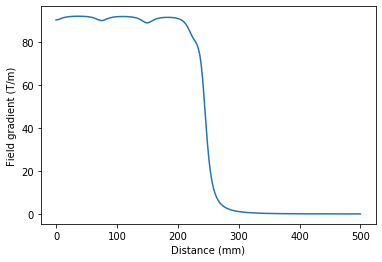

In [9]:
quad.plot_gradient([0, 500, 0])

The wiggles observed on the figure above are due to the loose longitudinal segmentation of the model. Let's refine the mesh and plot the gradient again.

In [ ]:
# Refine the mesh
params.refine_mesh(long_sub_n=20)

# Build and solve - Takes longer!
quad = mm.QuadEM(params)

# Plot the gradient
quad.plot_gradient([0, 500, 0])

### Integrated field multipoles

The integral of the field can be expressed as series: 
\begin{equation}
B_Z + i B_X = \sum_{1}^{\infty}{\left(b_n + i a_n\right)\left(\frac{x + i z}{\rho_0}\right)^{n-1}}
\end{equation}
where $b_n$ and $a_n$ are the normal and skew multipole coefficients and $\rho_0$ is the reference radius.

           Normal     skew       Normal     skew      
           T mm       T mm       a.u        a.u.      
         0  -2.68e-14   1.20e-14  -0.00e+00   0.00e+00
         1   3.14e+02  -4.09e-14   1.00e+04  -0.00e+00
         2   5.29e-15  -7.37e-15   0.00e+00  -0.00e+00
         3   3.03e-15  -3.34e-15   0.00e+00  -0.00e+00
         4   7.13e-15  -5.25e-15   0.00e+00  -0.00e+00
         5  -2.98e-02  -5.33e-15  -9.50e-01  -0.00e+00
         6   1.32e-14  -2.61e-15   0.00e+00  -0.00e+00
         7  -8.88e-15  -5.33e-15  -0.00e+00  -0.00e+00
         8   1.68e-15  -1.71e-14   0.00e+00  -0.00e+00
         9   1.35e-02   5.33e-15   4.30e-01   0.00e+00
        10   2.00e-15   1.20e-14   0.00e+00   0.00e+00
        11   5.20e-16   1.09e-14   0.00e+00   0.00e+00
        12   6.50e-16   4.84e-15   0.00e+00   0.00e+00
        13  -1.44e-02   5.33e-15  -4.60e-01   0.00e+00
        14  -3.16e-15  -7.44e-15  -0.00e+00  -0.00e+00


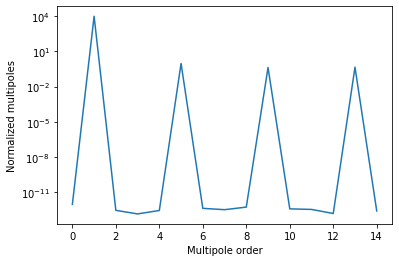

In [10]:
# Reference radius (mm)
rho = 7

# Integrated multipoles
multi = quad.multipoles(r0=rho)[0]

# Print
print('{0:{w}} {1:{w}} {2:{w}} {3:{w}} {4:{w}}'.format('', 'Normal', 'skew', 'Normal', 'skew', w=10))
print('{0:{w}} {1:{w}} {2:{w}} {3:{w}} {4:{w}}'.format('', 'T mm', 'T mm', 'a.u', 'a.u.', w=10))
for k in range(len(multi)):
    print('{0:{w}} {1:{w}.2e} {2:{w}.2e} {3:{w}.2e} {4:{w}.2e}' \
          .format(k, np.real(multi[k]), np.imag(multi[k]), 
                  round(1e4*np.real(multi[k])/abs(multi[1]), 2), 
                  round(1e4*np.imag(multi[k])/abs(multi[1]), 2), w=10))
    
# Plot
semilogy(1e4*np.abs(multi)/abs(multi[1]))
xlabel('Multipole order');
ylabel('Normalized multipoles');

Usage of the *multipoles* and *strengths* methods:

In [12]:
help(quad.multipoles)
help(quad.strengths)

Help on method multipoles in module radia_mm:

multipoles(r0=10, xz0=[0, 0], n_multi=32) method of radia_mm.QuadEM instance
    Basic 2D circular multipole computations
    :param r0=10: reference radius (mm)
    :param xz0=[0,0]: Centre [x0, z0] (mm)
    :param n_multi=32: number of multipole coefficients
    :return multi, ib, ib_r, xz: complex numpy arrays: multipoles (Tmm), integrated fields ibz + 1j * ibx (Tmm),
            radial field (Tmm), positions (mm)

Help on method strengths in module radia_mm:

strengths(r0=10, xz0=[0, 0], n_multi=32, b_rho=1) method of radia_mm.QuadEM instance
    Basic 2D multipole strength computations
    param r0=10: reference radius (mm)
    :param xz0=[0,0]: Centre [x0, z0] (mm)
    :param n_multi=32: number of multipole strength coefficients
    :param b_rho=1: magnetic rigidity (Tmm)
    :return: strengths: complex numpy array containing the multipole strengths



**Note** At the present stage of the RadiaMM development, the multipole computations are basic. It is not foreseen to develop it further in this module, but to build another independent C++ library dedicated to that purpose. 

## Fit a quadrupole model to particle trajectories

Compute the trajectories and fit a thick quadrupole matrix:

In [13]:
# Compute trajectories and fit a quad... Takes a few minutes
results, trj, grad = quad.fit_quad()

# Print the results
print('Magnetic length: {0:0.2f} mm'.format(results[1]))
print('Gradient: {0:.2f} T/m'.format(results[2]))
print('Integrated gradient: {0:0.2f} T'.format(results[0]))

Magnetic length: 496.78 mm
Gradient: 90.37 T/m
Integrated gradient: 44.89 T


Plot the trajectories: 

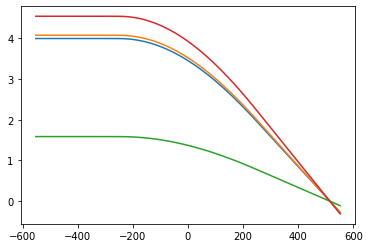

In [14]:
for k in range(len(trj)):
    plot(trj[k][0], trj[k][1])

Use the computed trajectories and compute a more elaborate model with symmetric thin lenses at extremities:

In [17]:
# Fit
results_end_effects, trj, grad = quad.fit_quad(end_effect=True, end_effect_sym=True, grad=grad, trj=trj)

# Print the results
print('Magnetic length: {0:0.2f} mm'.format(results_end_effects[1]))
print('Gradient (main): {0:.2f} T/m'.format(results_end_effects[2]))
print('Integrated gradient (main): {0:0.2f} T'.format(results_end_effects[0]))
print('Integrated gradient (end): {0:0.4f} T'.format(results_end_effects[3]))

Magnetic length: 496.77 mm
Gradient (main): 90.37 T/m
Integrated gradient (main): 44.89 T
Integrated gradient (end): 0.00 T


## Shape the magnet

### Plot the profile

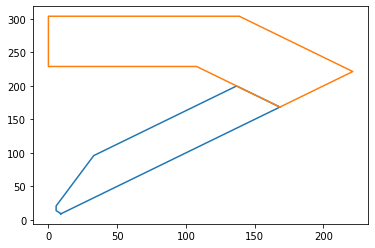

--- Pole profile ---
Point number:  0, Position: [      8.91,      8.91], Subdivision: [  3,       1.0] 
Point number:  1, Position: [      8.61,     9.939], Subdivision: [  3,       1.0] 
Point number:  2, Position: [     7.872,     11.08], Subdivision: [  3,       1.0] 
Point number:  3, Position: [     6.756,     12.27], Subdivision: [  3,       1.0] 
Point number:  4, Position: [     5.611,     13.78], Subdivision: [  3,       1.0] 
Point number:  5, Position: [     5.611,     20.78], Subdivision: [  1,       1.0] 
Point number:  6, Position: [     32.97,     95.96], Subdivision: [  1,       1.0] 
Point number:  7, Position: [     136.9,     199.9], Subdivision: [  5,       1.0] 
Point number:  8, Position: [     168.4,     168.4], Subdivision: [ 20,      0.05] 
--- Backleg yoke profile ---
Point number:  0, Position: [     168.4,     168.4], Subdivision: [  5,       1.0] 
Point number:  1, Position: [     136.9,     199.9], Subdivision: [  1,       1.0] 
Point number:  2, Position

In [3]:
quad.plot_profile()
quad.print_profile()

### Change the magnet parameters

Create new magnet parameters as defined in the figure below [4].
<img src="./images/quad_params.png" width="200">

In [7]:
# Define the pole profile
shape = [0, 0, 0, 0, 0] # Each dx + i dy gives the displacement with respect to a hyperbola

# Other yoke parameters (see the figure)
length = 500 # (mm)
r0=12.5 # (mm)
x0=12.5 # (mm)
r1=7 # (mm)
r2=80 # (mm)
r3=150 # (mm)
r4=40# (mm)
w=70 # (mm)
theta_2=20 # (deg)
theta_3=45 # (deg)

Build parameters objects

In [8]:
# New profile parameter object
profile_params = mm.QuadEMYokeProfileParam(pole_shape=shape, pole_type='shape', r0=r0,
                                               x0=x0, r1=r1, r2=r2, r3=r3, r4=r4, w=w, 
                                               theta_2=theta_2, theta_3=theta_3)

# Set a loose mesh for fast computations and plot
mesh_params = mm.MeshExtTriParam(area_max=1000, long_sub=[1, 1], long_sub_ext=[1,1])

# Insert it in yoke parameters
yoke_params = mm.QuadEMYokeParam(length=length, profile_params=profile_params, 
                                 mesh_params=mesh_params)

# Modify the default coil parameters
coil_params = mm.CoilParam(height=130, width=25, dr=5, turns=80)

# Put all together in quadrupole parameters
quad_params = mm.QuadEMParam(yoke_params=yoke_params, coil_params=coil_params)

Build and plot the magnet without solving:

In [9]:
new_quad = mm.QuadEM(quad_params, solve_switch=False)

Move the central pole profile point 1 mm  towards the bore

In [11]:
# Change a point in the parameters
shape[0] = -(1 + 1j) / 2 ** 0.5

# Rebuild the quadrupole and plot
new_quad.rebuild()
new_quad.plot_geo()

11 / 6 / 2020  at  20 : 28 : 20  Start to solve the magnetization problem...
11 / 6 / 2020  at  20 : 28 : 21  Magnetization problem solved.


Modify other parameters and rebuild the model:

In [13]:
# Taper the poles
profile_params.theta_3 = 30 # (deg)

# Modify the length
yoke_params.length = 100 # (mm)

# Modify the coil height
coil_params.height = 50 # (mm)

# Rebuild the quadrupole and plot
new_quad.rebuild()
new_quad.plot_geo()

11 / 6 / 2020  at  20 : 32 : 37  Start to solve the magnetization problem...
11 / 6 / 2020  at  20 : 32 : 38  Magnetization problem solved.


## Other features

Solve a built quadrupole

In [ ]:
new_quad.solve()

Change the current

In [ ]:
new_quad.set_current(50)

Feed a quad with sextupole food

In [ ]:
# Sextupole parameters
sextu_params = mm.SextuEMParam()

# Build and solve
quad_bizarre = mm.QuadEM(sextu_params, solve_switch=False)
quad_bizarre.plot_geo()

## References

[1] The <a href="https://gitlab.esrf.fr/IDM/radia/radiamm" target="_blank">radia_mm</a> Python module

[2] Radia <a href="https://github.com/ochubar/Radia" target="_blank">Github</a> repository

[3] o Chubar *et al*, J. Synchrotron Rad. 5, pp. 481-484, 1998

[4] G Le Bec *et al.*, Phys. Rev. st Accel. Beams 19, 052401, 2016  